## Ejemplo de Tunnel Traffic 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Parte 1
## Linear Regression With Time Series

In [2]:
df=pd.read_csv("tunnel.csv")
dft=df.copy()
dft.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [3]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          747 non-null    object
 1   NumVehicles  747 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


Inicialmente se crea el tiempo dummy o ficticio, para la caracteristica paso de tiempo, para esto se crea una columna con paso de 1 en 1.

In [4]:
dft["Time"]=np.arange(len(dft.index))
dft

,Day,NumVehicles,Time
0,2003-11-01,103536,0
1,2003-11-02,92051,1
2,2003-11-03,100795,2
3,2003-11-04,102352,3
4,2003-11-05,106569,4
...,...,...,...
742,2005-11-12,104646,742
743,2005-11-13,94424,743
744,2005-11-14,112165,744
745,2005-11-15,114296,745


Hagamos la regresion lineal con esta nueva variable tiempo 

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X=dft.loc[:,["Time"]]# caracteristica 
y=dft.loc[:,"NumVehicles"]# variable objetivo
modelo=LinearRegression()
modelo.fit(X,y) # entrenando el modelo
y_pred = pd.Series(modelo.predict(X), 
                   index=X.index)# prediciones del modelo

Antes de avanzar observemos que X es un data frame y y es una serie 

In [7]:
print(type(X))
print(type(y))
display(X.head())
display(y.head())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,Time
0,0
1,1
2,2
3,3
4,4


0    103536
1     92051
2    100795
3    102352
4    106569
Name: NumVehicles, dtype: int64

Obtengamos los valores de la regresión lineal

In [8]:
print("El coeficiente es ",round(modelo.coef_[0],2),"\nEl intercepto es ",
      round(modelo.intercept_,1))

El coeficiente es  22.5 
El intercepto es  98176.2


Por tanto la ecuación de la recta es 

 <center>$Vehicles = 22.5 * Time + 98176.2$

Grafiquemos 

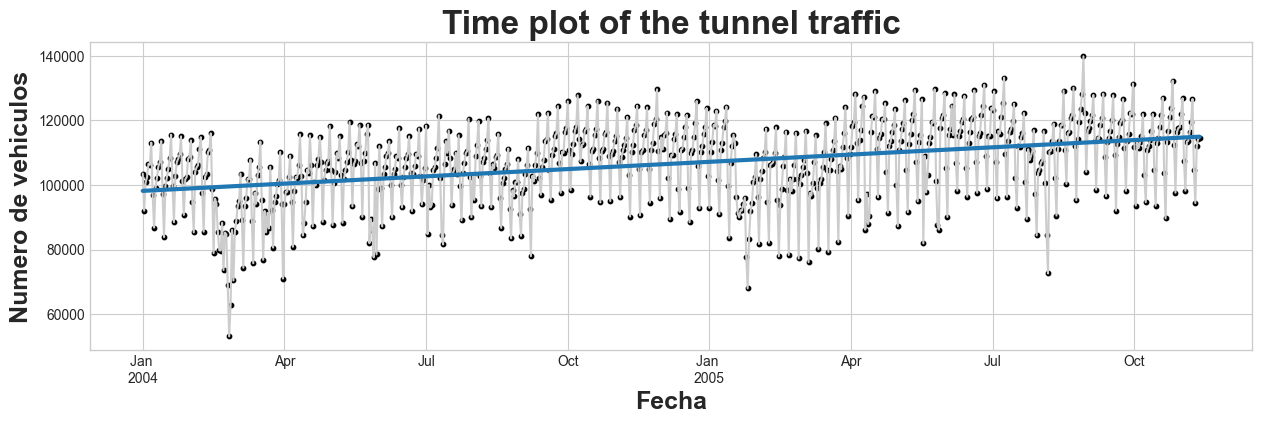

In [9]:
plt.style.use("seaborn-whitegrid")
fig, ax=plt.subplots( figsize=(15, 4))
ax.scatter(y.index,y.values,color="0.01",s=10)
ax.plot(y.index,y.values,color="0.8")
ax.plot(y.index,y_pred.values,linewidth=3)
ax.set_xticks([0,100,200,300,400,500,600,700]
    ,labels=['Jan \n2004', 'Apr', 'Jul', 'Oct', 'Jan \n2005', 'Apr', 'Jul', 'Oct'])
ax.set_title("Time plot of the tunnel traffic",
             fontdict={'fontsize':24,'fontweight':"bold"})
ax.set_xlabel("Fecha",fontdict={'fontsize':18,'fontweight':"bold"})
ax.set_ylabel("Numero de vehiculos",fontdict={'fontsize':18,'fontweight':"bold"})
plt.show()

Ahora obtengamos la caracteristica retrasada **Lag** 

In [10]:
dft["Lag_1"]=dft['NumVehicles'].shift(1)
dft.head()

,Day,NumVehicles,Time,Lag_1
0,2003-11-01,103536,0,NaN
1,2003-11-02,92051,1,103536.0
2,2003-11-03,100795,2,92051.0
3,2003-11-04,102352,3,100795.0
4,2003-11-05,106569,4,102352.0


Ahora se aplicara la regresión lineal pero debemos eliminar los valores nulos 

In [11]:
from sklearn.linear_model import LinearRegression
X_lag=dft.loc[:,["Lag_1"]] # caracteristica lag_1
X_lag.dropna(inplace=True)
y_lag=dft.loc[:,"NumVehicles"]
# teneindo en cuenta que para X se ha utilizado 
#dropna debemos tomar los mismo valores en y 
y_lag,X_lag=y_lag.align(X_lag,join="inner") # se alinean los valores con el inner join 


modelo_lag = LinearRegression()#modelo
modelo_lag.fit(X_lag, y_lag)#entrenamiento 

y_pred_lag=pd.Series(modelo_lag.predict(X_lag),index=X_lag.index)

Obtengamos los valores de la regresión lineal con el lag

In [12]:
print("El coeficiente es ",round(modelo_lag.coef_[0],2),
      "\nEl intercepto es ",round(modelo_lag.intercept_,1))

El coeficiente es  0.53 
El intercepto es  49780.6


Por tanto la ecuación de la recta es

<center>$𝑉𝑒ℎ𝑖𝑐𝑙𝑒𝑠=0.53∗lag+49780.6$

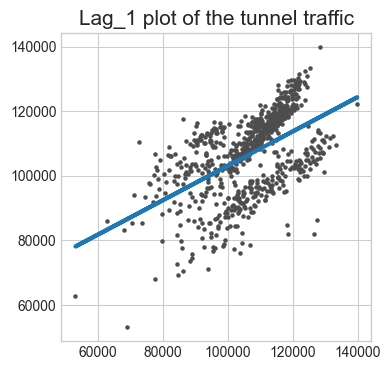

In [13]:
plt.style.use("seaborn-whitegrid")
fig, ax=plt.subplots( figsize=(4, 4))
ax.scatter(X_lag.values,y_lag.values,color="0.3",s=5)
ax.plot(X_lag.values,y_pred_lag.values,linewidth=3)
ax.set_title("Lag_1 plot of the tunnel traffic",fontdict={'fontsize':15})
plt.show()

Ahora adicionemos las y predichas desde time y lag_1

In [14]:
dft["Pred_NumVehicles_Time"]=y_pred.values
v1=np.array([np.NaN])
dft["Pred_NumVehicles_lag"]=np.append(v1,y_pred_lag.values)
dft.head()

,Day,NumVehicles,Time,Lag_1,Pred_NumVehicles_Time,Pred_NumVehicles_lag
0,2003-11-01,103536,0,NaN,98176.206344,NaN
1,2003-11-02,92051,1,103536.0,98198.703794,104961.799284
2,2003-11-03,100795,2,92051.0,98221.201243,98840.684037
3,2003-11-04,102352,3,100795.0,98243.698693,103500.939302
4,2003-11-05,106569,4,102352.0,98266.196142,104330.767464


Como se observa cada uno de los predichos es un numero aproximado, por tanto, el intercepto es cercano a ellos ya que deben adicionarse teniendo en cuenta que 
<center>$target = weight_1 * feature_1 + weight_2 * feature_2 + bias$
    
    se tiene que 
<center>$𝑉𝑒ℎ𝑖𝑐𝑙𝑒𝑠=0.53∗lag+22.5 * Time + bias$ 

para encontarr un valor cercano utilicemos la grafica 

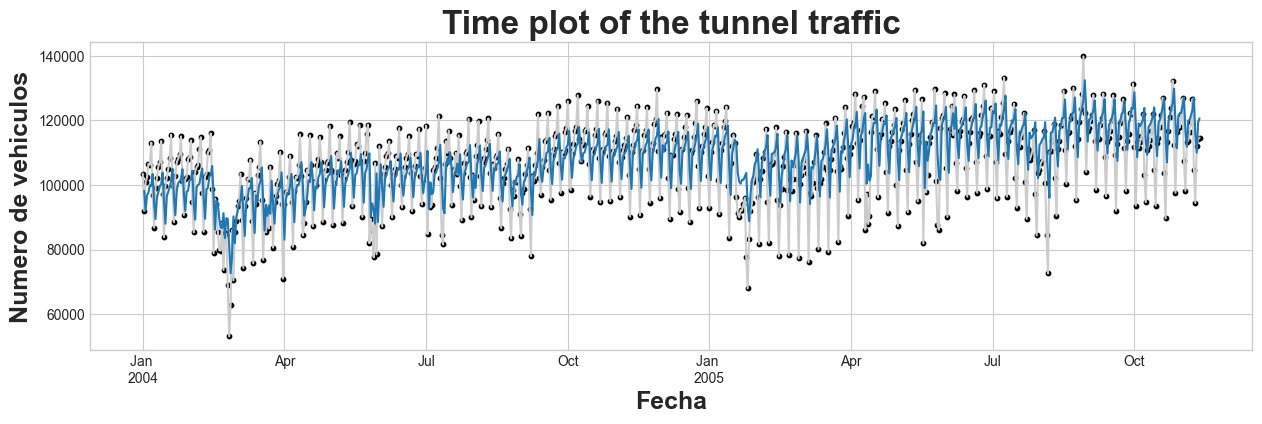

In [15]:
plt.style.use("seaborn-whitegrid")
fig, ax=plt.subplots( figsize=(15, 4))
ax.scatter(y.index,y.values,color="0.01",s=10)
ax.plot(y.index,y.values,color="0.8")
ax.plot(y.index[1:],y_pred.values[1:]+y_pred_lag.values-105000,linewidth=1.5)
ax.set_xticks([0,100,200,300,400,500,600,700]
    ,labels=['Jan \n2004', 'Apr', 'Jul', 'Oct', 'Jan \n2005', 'Apr', 'Jul', 'Oct'])
ax.set_title("Time plot of the tunnel traffic",
             fontdict={'fontsize':24,'fontweight':"bold"})
ax.set_xlabel("Fecha",fontdict={'fontsize':18,'fontweight':"bold"})
ax.set_ylabel("Numero de vehiculos",fontdict={'fontsize':18,'fontweight':"bold"})
plt.show()

Anque la forma es muy similar se tiene que al final aumenta mucho los valores y no se es claro como calcular bias en el proceso.

# Parte 2 Trend

La primera manera de sacar el tren o tendencia a largo plazo de la serie de tiempo,es realizando un ventaneo y tomando la media del mismo para esto el metodo roliing de pandas 

In [16]:
dft2=df.copy()
dft2.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


Realizando el ventaneo

In [17]:
ventaneo_promedio=dft2["NumVehicles"].rolling(window=365, #longitud de la ventana,
                 center=True#promedio centrado en cada posicion 
                 ,min_periods=183#minima longitud de la ventana
                              ).mean()# media de la ventana
print(type(ventaneo_promedio))
ventaneo_promedio.head()

<class 'pandas.core.series.Series'>


0    99127.426230
1    99094.489130
2    99112.481081
3    99146.639785
4    99196.122995
Name: NumVehicles, dtype: float64

Vemos que se produce una serie de pandas y solo se realiza el rooling siobre la variable tipo float, pues sobre la columna Day los datos son objetos y por tanto, no se puede realizar sobre la columna Day. Ahora grafiquemos la serie obtenida 

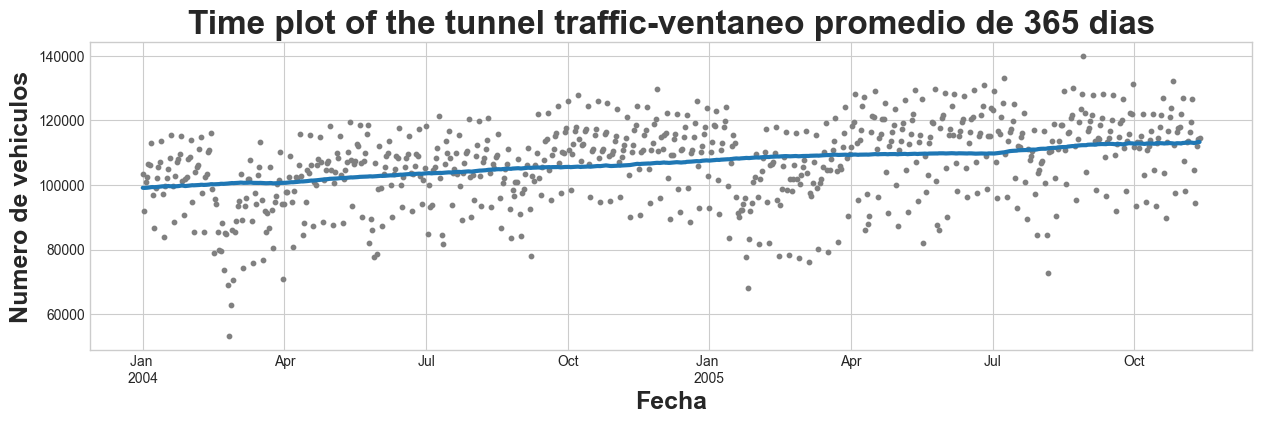

In [18]:
plt.style.use("seaborn-whitegrid")
fig, ax=plt.subplots( figsize=(15, 4))
ax.scatter(y.index,y.values,color="0.5",s=10)
ax.plot(y.index,ventaneo_promedio.values,linewidth=3)

ax.set_xticks([0,100,200,300,400,500,600,700]
    ,labels=['Jan \n2004', 'Apr', 'Jul', 'Oct', 'Jan \n2005', 'Apr', 'Jul', 'Oct'])
ax.set_title("Time plot of the tunnel traffic-ventaneo promedio de 365 dias"
             ,fontdict={'fontsize':24,'fontweight':"bold"})
ax.set_xlabel("Fecha",fontdict={'fontsize':18,'fontweight':"bold"})
ax.set_ylabel("Numero de vehiculos",fontdict={'fontsize':18,'fontweight':"bold"})
plt.show()

En la grafica se observa el trend bien defino.

Otra forma de obtenerlo, es a traves de machine learning para esto primero se creara un indice de tiempo ficticio o DUMMY, utilizando la libreria statsmodels, para que no queden valores nulos o NAN en la creación del tiempo ficticio (DUMMY), de esta manera el aprendisaje automatisado o la Regrecion lineal se calculara correctamente. 

In [19]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=dft2.index,  # indice del dataframe
    constant=True,       # dummy caracteristica que calcula el intercepto (y_intercept)
    order=2,             # indice de tiempo ficticio (trend)
    drop=True,           # drop elimina terminos colineales si los hay
)
# `in_sample` creates features for the dates given in the `index` argument
X_trend = dp.in_sample()# da los valores del X dentro de los indices 
X_trend.head()

,const,trend,trend_squared
0,1.0,1.0,1.0
1,1.0,2.0,4.0
2,1.0,3.0,9.0
3,1.0,4.0,16.0
4,1.0,5.0,25.0


Como se observa en la salida anterior se creo un tiempo ficticio contante, lineal y cuadratico debido a que el orden es 2.

Ahora a entrenar el modelo utilizando los tiempos ficticios (DUMMY) creados 

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
y_trend = dft2["NumVehicles"]  # variable objetivo
modelo_trend= LinearRegression(fit_intercept=False)
modelo_trend.fit(X_trend, y_trend)

y_pred_trend = pd.Series(modelo_trend.predict(X_trend),
                         index=X_trend.index)


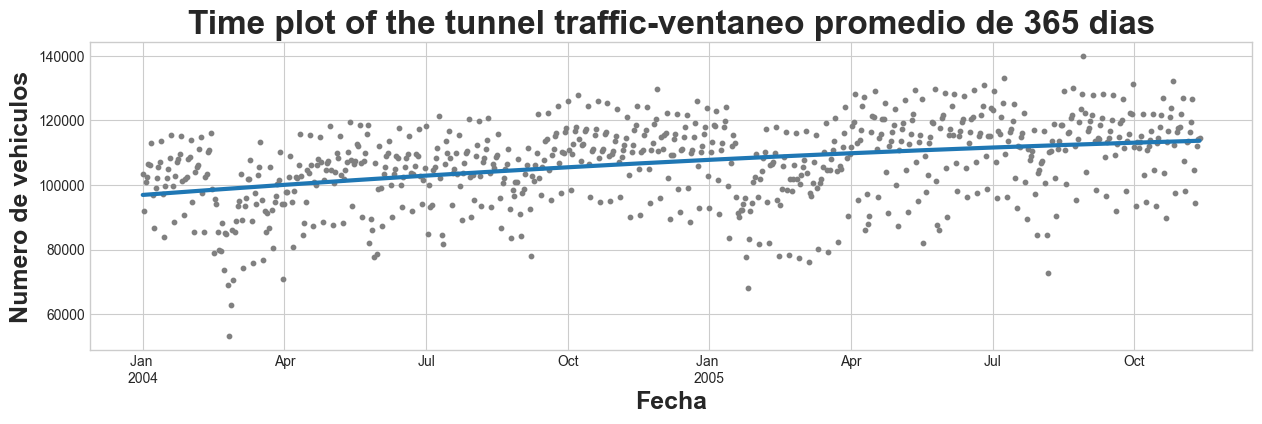

In [22]:
plt.style.use("seaborn-whitegrid")
fig, ax=plt.subplots( figsize=(15, 4))
ax.scatter(y.index,y.values,color="0.5",s=10)
ax.plot(y.index,y_pred_trend.values,linewidth=3)

ax.set_xticks([0,100,200,300,400,500,600,700]
    ,labels=['Jan \n2004', 'Apr', 'Jul', 'Oct', 'Jan \n2005', 'Apr', 'Jul', 'Oct'])
ax.set_title("Time plot of the tunnel traffic-ventaneo promedio de 365 dias"
             ,fontdict={'fontsize':24,'fontweight':"bold"})
ax.set_xlabel("Fecha",fontdict={'fontsize':18,'fontweight':"bold"})
ax.set_ylabel("Numero de vehiculos",fontdict={'fontsize':18,'fontweight':"bold"})
plt.show()

Si se quiere predecir el comportamiento del trend se utiliza 

In [23]:
X_fore_trend=dp.out_of_sample(200) #predice cincuenta valores 
#de los indices de orden escojido para este caso 2
X_fore_trend.head()

,const,trend,trend_squared
747,1.0,748.0,559504.0
748,1.0,749.0,561001.0
749,1.0,750.0,562500.0
750,1.0,751.0,564001.0
751,1.0,752.0,565504.0


In [24]:
y_fore_trend=pd.Series(modelo_trend.predict(X_fore_trend),
                       index=X_fore_trend.index)

Grafiquemos

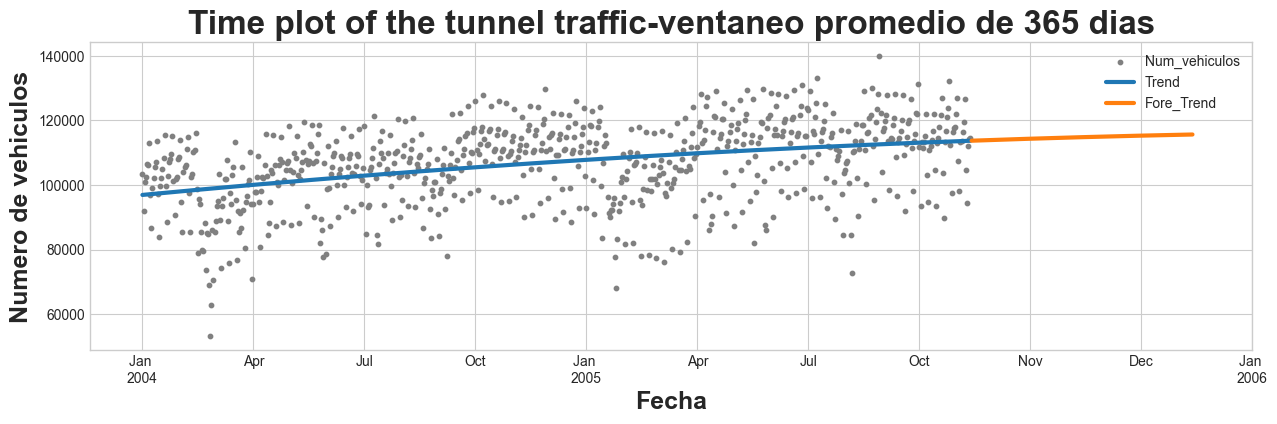

In [25]:
plt.style.use("seaborn-whitegrid")
fig, ax=plt.subplots( figsize=(15, 4))
ax.scatter(y.index,y.values,color="0.5",s=10,label="Num_vehiculos")
ax.plot(y.index,y_pred_trend.values,linewidth=3,label="Trend")
ax.plot(y_fore_trend.index,y_fore_trend.values,linewidth=3,
        label="Fore_Trend")
ax.set_xticks([0,100,200,300,400,500,600,700,800,900,1000]
    ,labels=['Jan \n2004', 'Apr', 'Jul', 'Oct', 'Jan \n2005', 'Apr', 
             'Jul', 'Oct',"Nov","Dec",'Jan \n2006'])
ax.set_title("Time plot of the tunnel traffic-ventaneo promedio de 365 dias"
             ,fontdict={'fontsize':24,'fontweight':"bold"})
ax.set_xlabel("Fecha",fontdict={'fontsize':18,'fontweight':"bold"})
ax.set_ylabel("Numero de vehiculos",fontdict={'fontsize':18,'fontweight':"bold"})
ax.legend()
plt.show()

Se observa que el trend predicho o forecast tiene un buen comportamiento.Si se cambia el orden a 5 por ejemplo el comproramiento ya no es aducuado y hay sobre ajuste.(intentalo)

# Parte 3 Seasonality
De nuevo leemos los datos 

In [26]:
dft3=df.copy()
dft3.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


Para estudiar los cambios estacionales se necesita transformar los datos, como primero pasar las fechas a dia de la semana, para eso los transformamos en datatime 

In [27]:
dft3["Day"]=pd.to_datetime(dft3["Day"])
dft3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          747 non-null    datetime64[ns]
 1   NumVehicles  747 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


Ya pasandolas a datetime, con la siguiente función obtenemos el día para cada fecha 

In [28]:
def dia_semana(fecha):
    numero=fecha.date().strftime('%A')
    return numero    

Creamos una nueva columna con el día de la semana

In [29]:
dft3["dia_sem"]=dft3["Day"].apply(dia_semana)
dft3

,Day,NumVehicles,dia_sem
0,2003-11-01,103536,Saturday
1,2003-11-02,92051,Sunday
2,2003-11-03,100795,Monday
3,2003-11-04,102352,Tuesday
4,2003-11-05,106569,Wednesday
...,...,...,...
742,2005-11-12,104646,Saturday
743,2005-11-13,94424,Sunday
744,2005-11-14,112165,Monday
745,2005-11-15,114296,Tuesday


Ahora usamos la transformación one hot encoder y drop la primera columna, para esto primero cambiamos la categoria de la columna dia_sem a categorico

In [30]:
dft3["dia_sem"]=dft3["dia_sem"].astype("category")
dft3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day          747 non-null    datetime64[ns]
 1   NumVehicles  747 non-null    int64         
 2   dia_sem      747 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 12.9 KB


In [31]:
from sklearn.preprocessing import OneHotEncoder
codificador=OneHotEncoder()
codificacion=codificador.fit_transform(dft3.loc[:,["dia_sem"]])
codificacion

<747x7 sparse matrix of type '<class 'numpy.float64'>'
	with 747 stored elements in Compressed Sparse Row format>

Vemos que regresa una matriz sparse, ahora añadamos esos datos de codificacion obtenimos al dataframe

In [32]:
nuevas_col=pd.DataFrame(codificacion.toarray(),
                columns=codificador.categories_[0])#evita multi index
nuevas_col

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
742,0.0,0.0,1.0,0.0,0.0,0.0,0.0
743,0.0,0.0,0.0,1.0,0.0,0.0,0.0
744,0.0,1.0,0.0,0.0,0.0,0.0,0.0
745,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Ahora ordenemos segun los dias de la semana y eliminemos el lunes 

In [36]:
nuevas_col=nuevas_col[["Monday","Tuesday","Wednesday",
                     "Thursday","Friday","Saturday","Sunday"]]
display(nuevas_col)
nuevas_col=nuevas_col.drop(["Monday"],axis=1)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
742,0.0,0.0,0.0,0.0,0.0,1.0,0.0
743,0.0,0.0,0.0,0.0,0.0,0.0,1.0
744,1.0,0.0,0.0,0.0,0.0,0.0,0.0
745,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Listo ya tenemos los dias de la semana para cada fecha, ahora concatenemos todo en un solo dataframe

In [37]:
dft3=pd.concat([dft3,nuevas_col],axis=1)
dft3=dft3.rename(columns={"Day":"Date"})
dft3.head(10)

,Date,NumVehicles,dia_sem,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2003-11-01,103536,Saturday,0.0,0.0,0.0,0.0,1.0,0.0
1,2003-11-02,92051,Sunday,0.0,0.0,0.0,0.0,0.0,1.0
2,2003-11-03,100795,Monday,0.0,0.0,0.0,0.0,0.0,0.0
3,2003-11-04,102352,Tuesday,1.0,0.0,0.0,0.0,0.0,0.0
4,2003-11-05,106569,Wednesday,0.0,1.0,0.0,0.0,0.0,0.0
5,2003-11-06,106284,Thursday,0.0,0.0,1.0,0.0,0.0,0.0
6,2003-11-07,113111,Friday,0.0,0.0,0.0,1.0,0.0,0.0
7,2003-11-08,96806,Saturday,0.0,0.0,0.0,0.0,1.0,0.0
8,2003-11-09,86811,Sunday,0.0,0.0,0.0,0.0,0.0,1.0
9,2003-11-10,99194,Monday,0.0,0.0,0.0,0.0,0.0,0.0


Si observamos el dataframe aunque tiene una transformación One hot no sirve para graficar para esto debemos otra vez, transformar la fecha a día de la semana pero numerico, como sigue:  

In [38]:
def dia_semana_num(fecha):
    numero=fecha.date().strftime('%w')
    return numero    

In [39]:
dft3["dia_sem_num"]=dft3["Date"].apply(dia_semana_num)
dft3

,Date,NumVehicles,dia_sem,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,dia_sem_num
0,2003-11-01,103536,Saturday,0.0,0.0,0.0,0.0,1.0,0.0,6
1,2003-11-02,92051,Sunday,0.0,0.0,0.0,0.0,0.0,1.0,0
2,2003-11-03,100795,Monday,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2003-11-04,102352,Tuesday,1.0,0.0,0.0,0.0,0.0,0.0,2
4,2003-11-05,106569,Wednesday,0.0,1.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...
742,2005-11-12,104646,Saturday,0.0,0.0,0.0,0.0,1.0,0.0,6
743,2005-11-13,94424,Sunday,0.0,0.0,0.0,0.0,0.0,1.0,0
744,2005-11-14,112165,Monday,0.0,0.0,0.0,0.0,0.0,0.0,1
745,2005-11-15,114296,Tuesday,1.0,0.0,0.0,0.0,0.0,0.0,2


Ahora si podemos graficar la estacionalidad semanal, para esto debemos tomar grupos de 7.

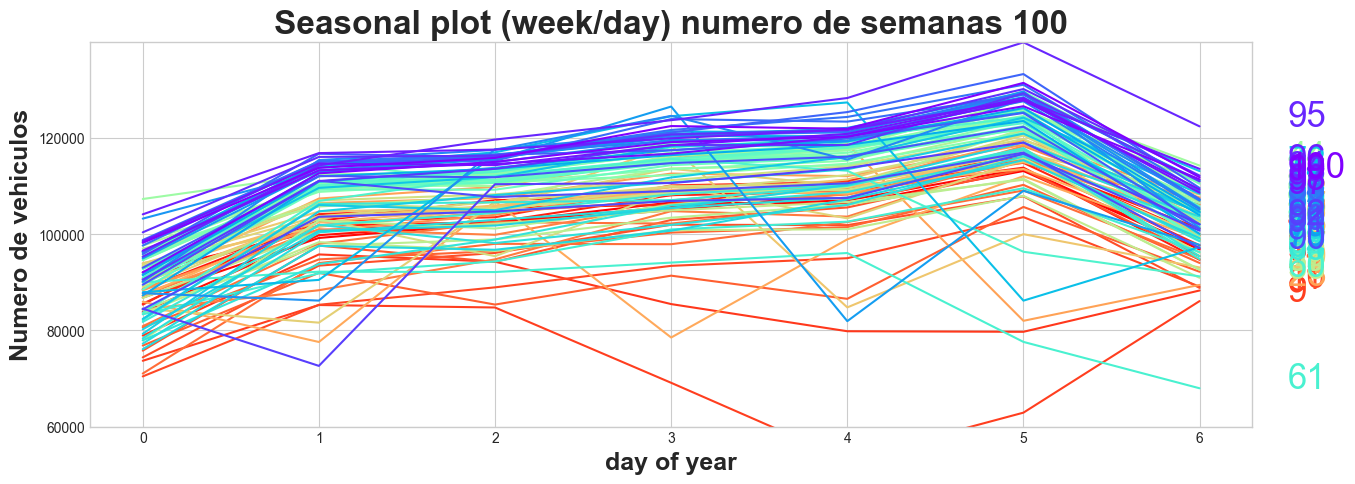

In [40]:
fig, ax=plt.subplots( figsize=(15, 5))
n_semanas=100
colors = plt.cm.rainbow(np.flip(np.linspace(0, 1, n_semanas)))
for i in range(n_semanas):
            ax.plot(dft3.dia_sem_num.values[1+7*i:8+7*i],
                    dft3.NumVehicles.values[1+7*i:8+7*i],
                    color=colors[i],label=f"{i}")
            ax.annotate(f"{i+1}",xy=(6+0.2, dft3.NumVehicles.values[7+7*i]),
            xytext=(6+0.5, dft3.NumVehicles.values[7+7*i]),       
                        color=colors[i],size=25)
            
#

ax.set_yticks(np.arange(60000,140000,20000))
ax.set_ylim(60000,140000)
ax.set_title(f"Seasonal plot (week/day) numero de semanas {n_semanas}",
             fontdict={'fontsize':24,'fontweight':"bold"})
ax.set_xlabel("day of year",fontdict={'fontsize':18,'fontweight':"bold"})
ax.set_ylabel("Numero de vehiculos",fontdict={'fontsize':18,'fontweight':"bold"})
plt.show()

Ahora debemos sacar la grafica de la estacionalida anual, con este fin creamos una función que calcula el año y luego vemos cuantos veces se repite cada uno


In [42]:
def año(fecha):
    numero=fecha.date().strftime('%y')
    return int(numero)+2000  

In [44]:
dft3["año"]=dft3["Date"].apply(año)
dft3.head()

,Date,NumVehicles,dia_sem,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,dia_sem_num,año
0,2003-11-01,103536,Saturday,0.0,0.0,0.0,0.0,1.0,0.0,6,2003
1,2003-11-02,92051,Sunday,0.0,0.0,0.0,0.0,0.0,1.0,0,2003
2,2003-11-03,100795,Monday,0.0,0.0,0.0,0.0,0.0,0.0,1,2003
3,2003-11-04,102352,Tuesday,1.0,0.0,0.0,0.0,0.0,0.0,2,2003
4,2003-11-05,106569,Wednesday,0.0,1.0,0.0,0.0,0.0,0.0,3,2003


In [48]:
display(dft3["año"].value_counts())
veces_ano=dft3["año"].value_counts().values
veces_ano

2004    366
2005    320
2003     61
Name: año, dtype: int64

array([366, 320,  61], dtype=int64)

para que quede la grafica bien hecha necesitamos saber que día del año es en cada fecha, de tal manera de poder crear un  nuevo indice entre 1 a 365.

Para eso constrimos la función 

In [77]:
def dia_ano(date):
    return (date-datetime(date.year,1,1)).days


In [79]:
dft3["dia_año"]=dft3["Date"].apply(dia_ano)
dft3.head()

,Date,NumVehicles,dia_sem,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,dia_sem_num,año,dia_año
0,2003-11-01,103536,Saturday,0.0,0.0,0.0,0.0,1.0,0.0,6,2003,304
1,2003-11-02,92051,Sunday,0.0,0.0,0.0,0.0,0.0,1.0,0,2003,305
2,2003-11-03,100795,Monday,0.0,0.0,0.0,0.0,0.0,0.0,1,2003,306
3,2003-11-04,102352,Tuesday,1.0,0.0,0.0,0.0,0.0,0.0,2,2003,307
4,2003-11-05,106569,Wednesday,0.0,1.0,0.0,0.0,0.0,0.0,3,2003,308


Teniendo este nuevo indice se puede graficar la estacionalidad anual

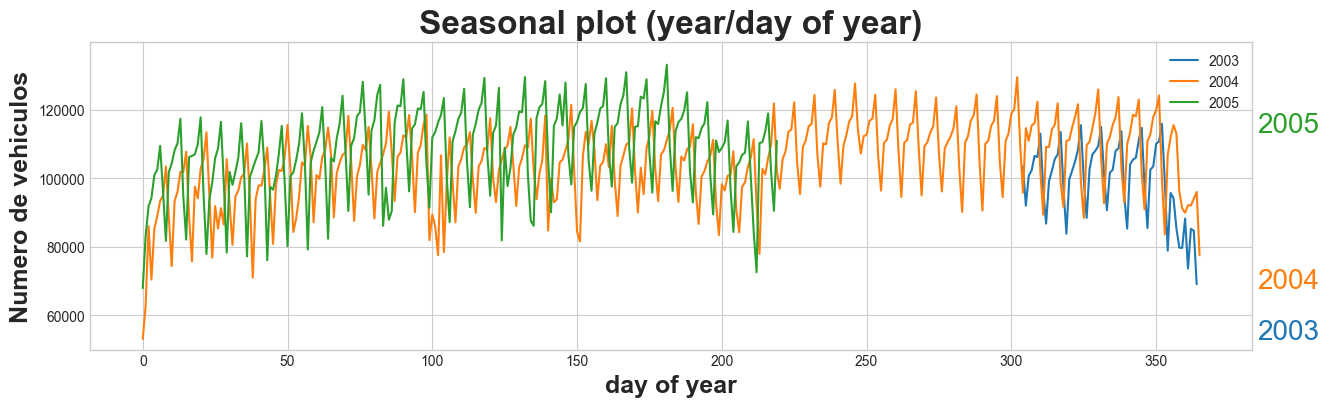

In [145]:
fig, ax=plt.subplots( figsize=(15, 4))
n_anos=2
dias_ano_index=[0,61,427,647]# dias de cada año dentro del indice
colors = plt.cm.rainbow(np.flip(np.linspace(0, 1, 2)))
for i,i_1,anot,j in zip(dias_ano_index,[61,427,647]
                      ,("2003","2004","2005"),np.arange(0,3)):
            ax.plot(dft3.dia_año[i:i_1],
                    dft3.NumVehicles.values[i:i_1],      
            label=f"{anot}")
            ax.annotate(f"{anot}",xy=(380, 
                                      dft3.NumVehicles.values[i_1]),
            xytext=(385, dft3.NumVehicles.values[i_1]),       
                        size=20,color=ax.get_lines()[j].get_color())
                
#

ax.set_yticks(np.arange(60000,140000,20000))
ax.set_ylim(50000,140000)
ax.set_title(f"Seasonal plot (year/day of year)",
             fontdict={'fontsize':24,'fontweight':"bold"})
ax.set_xlabel("day of year",fontdict={'fontsize':18,'fontweight':"bold"})
ax.set_ylabel("Numero de vehiculos",
              fontdict={'fontsize':18,'fontweight':"bold"})
ax.legend()
plt.show()

In [ ]:
5198+1198118

In [ ]:
jbf9fbufbo

In [ ]:
ahbfiafbafboufbou

In [ ]:
bibbobnufnfniofdn